In [1]:
import os

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from astropy.cosmology import Planck15 as cosmo

In [5]:
import isotropy

## Read in the pickle file

In [6]:
mockDataFile = os.path.join(isotropy.example_data_dir, 'snFits.p.gz')

In [7]:
sampleData, totalSN = isotropy.read_mockDataPickle(mockDataFile)

In [8]:
sampleData.head()

,z,mu,mu_var
10005,0.968958,14.448511,0.253021
10024,0.861278,14.663764,0.276984
10034,0.820012,14.292957,0.301233
10059,1.040996,15.308183,0.537081
10087,0.981252,14.371889,0.393810


In [9]:
# Total number of SN in the simulation (before we threw away bad points)
totalSN

1622

In [10]:
sampleData['mu_err'] = sampleData.mu_var.apply(np.sqrt)

In [11]:
sampleData.head()

,z,mu,mu_var,mu_err
10005,0.968958,14.448511,0.253021,0.503012
10024,0.861278,14.663764,0.276984,0.526293
10034,0.820012,14.292957,0.301233,0.548847
10059,1.040996,15.308183,0.537081,0.732858
10087,0.981252,14.371889,0.393810,0.627543


In [12]:
# mu_err > 5.0 is pretty useless, throw them 

In [12]:
sampleData = sampleData.query('mu_err < 5.0')

## Get statistics of binned quantities

In [13]:
df = isotropy.binnedDescStat(sampleData)

In [14]:
# removes the nans

In [15]:
df = df.dropna()

In [16]:
df

,count,mean,std
binindex,,,
1,5,0.639079,0.453628
2,12,0.654472,0.736472
3,53,0.466996,0.407956
4,78,0.382548,0.165145
5,99,0.495683,0.263740
6,145,0.462202,0.166019
7,186,0.589450,0.379160
8,209,0.608655,0.316810
9,221,0.671122,0.260682


In [17]:
# Now create samples of size numSN = 50000

## Create a sample of sn with z, mu, mu_err 

In [18]:
numSN = 50000
dfmu = isotropy.drawSamples(df, numSN, totalSN, np.random.RandomState(0))

In [19]:
dfmu.head()

,mu,mu_err,z
0,38.935769,0.355757,0.154881
1,39.435058,-0.157277,0.171519
2,39.512421,0.614198,0.160276
3,41.454780,1.214291,0.154488
4,39.243108,-0.016310,0.142365


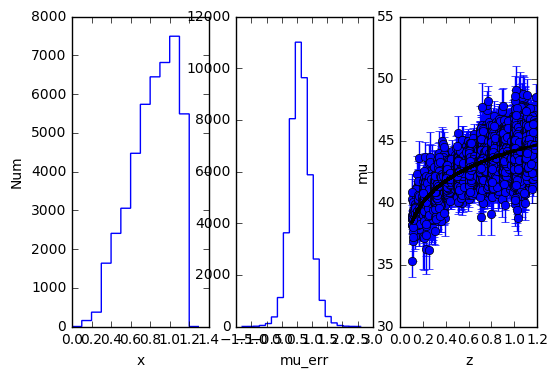

In [20]:
fig, ax = plt.subplots(1,3)
_ = ax[0].hist(dfmu.z, bins=np.arange(0., 1.4, 0.1), histtype='step')
_ = ax[1].hist(dfmu.mu_err, bins=20, histtype='step')
_ = ax[2].errorbar(dfmu.z, dfmu.mu, yerr=dfmu.mu_err.values, fmt='o')
_ = ax[2].plot(dfmu.z, cosmo.distmod(dfmu.z), 'k-', lw=2.)
ax[0].set_xlabel('x')
ax[0].set_ylabel('Num')
ax[1].set_xlabel('mu_err')
ax[2].set_xlabel('z')
ax[2].set_ylabel('mu')

These show:
    - z histogram in the first panel
    - mu_err histogram in the second plot
    - hubble diagram in the 3rd plot, with the line showing the true cosmology values

The distribution of mu_err in the 2nd panel is a problem because it is going below 0. Surely not a good repesentation!

In [22]:
from utils import plotutils as pl

(0.10046954761925471, 1.5)

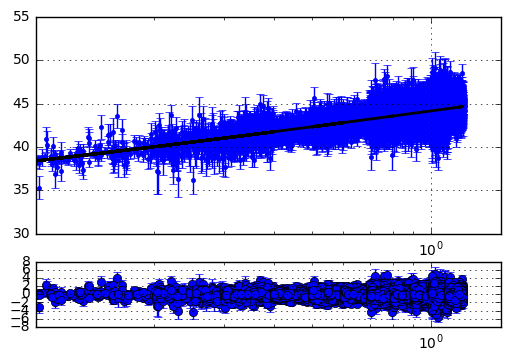

In [33]:
fig, ax0, ax1 = pl.settwopanel(setdifflimits=None)
ax0.errorbar(dfmu.z, dfmu.mu, yerr=dfmu.mu_err.values, fmt='.')
ax0.plot(dfmu.z, cosmo.distmod(dfmu.z), 'k-', lw=2.)
ax0.set_xscale('log')
ax1.errorbar(dfmu.z, dfmu.mu - cosmo.distmod(dfmu.z).value, yerr=dfmu.mu_err.values, fmt='o')
ax1.set_xscale('log')
ax0.set_xlim(0., 1.5)
ax1.set_xlim(0., 1.5)